A continuación se analizan 3 situaciones experimentales (“ej1a.csv”, “ej1b.csv”,
“ej1c.csv”), las cuales se analizan con diferentes funciones de distribución: poisson, normal y binomial. 

Adicionalmente se hace uso del test de chi-cuadrado para determinar cual es la mejor distribución que describe los datos experimentales.

In [ ]:
from numpy import exp, linspace, random, std, mean, log10, ceil, diag, sqrt
import scipy.special
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt

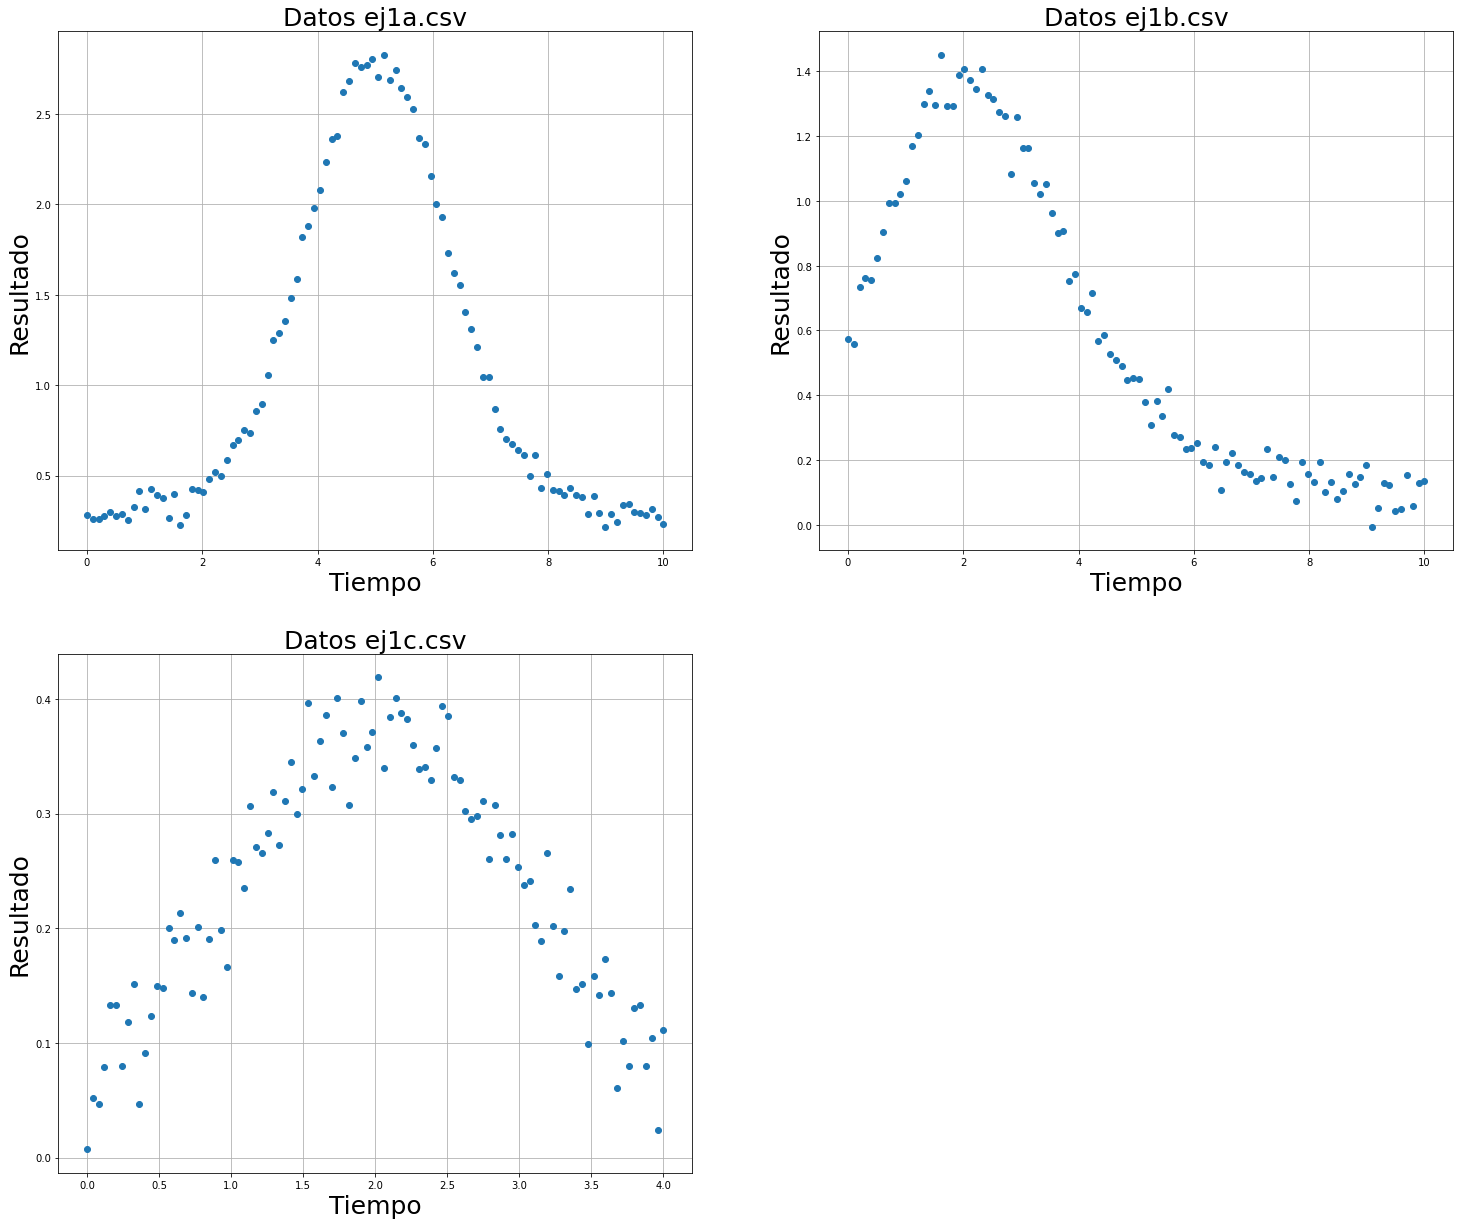

In [ ]:
# Se cargan los archivos
dat1 = pd.read_csv('ej1a.csv')
dat2 = pd.read_csv('ej1b.csv')
dat3 = pd.read_csv('ej1c.csv')


# Se crean columnas para el tiempo y para los resultados
dat1 = pd.DataFrame(dat1, columns=['tiempo','resultado'])
dat2 = pd.DataFrame(dat2, columns=['tiempo','resultado'])
dat3 = pd.DataFrame(dat3, columns=['tiempo','resultado'])

dat1t = dat1['tiempo']
dat1r = dat1['resultado']
dat2t = dat2['tiempo']
dat2r = dat2['resultado']
dat3t = dat3['tiempo']
dat3r = dat3['resultado']


# Graficación de datos
plt.rcParams['figure.figsize'] = 25,21

ax=plt.subplot(2,2,1)
plt.title('Datos ej1a.csv', fontsize= 25)
plt.plot(dat1t,dat1r, 'o')
plt.xlabel('Tiempo',fontsize= 25)
plt.ylabel('Resultado',fontsize= 25)
plt.grid()

ax=plt.subplot(2,2,2)
plt.title('Datos ej1b.csv',fontsize= 25)
plt.plot(dat2t,dat2r, 'o')
plt.xlabel('Tiempo',fontsize= 25)
plt.ylabel('Resultado',fontsize= 25)
plt.grid()

ax=plt.subplot(2,2,3)
plt.title('Datos ej1c.csv',fontsize= 25)
plt.plot(dat3t,dat3r, 'o')
plt.xlabel('Tiempo',fontsize= 25)
plt.ylabel('Resultado',fontsize= 25)
plt.grid()



Ahora se procede a encontrar los parámetros de ajuste.
Para esto primero se definen las funciones asociadas a cada tipo de distribución (gaussiana, de Poisson y binomial)

In [ ]:
# Distribución Gaussiana

def gaussiana(x, amp, cen,anc):
    return amp*exp(-(x-cen)**2/anc)

# Distribución de Poisson

def poisson(x, mu, amp):
    return amp*exp(-mu)*((mu**x)/scipy.special.factorial(x))

# Distribución binomial

def binomial(x, p, n, amp):
    return amp*((scipy.special.factorial(n))/(scipy.special.factorial(x)*scipy.special.factorial(n-x)))*(p**x)*((1-p)**(n-x))


In [ ]:
# Ajustes con distribución Gaussina ej1a.csv

val_ini = [1,5,1]
mej_val1, cov1 = curve_fit(gaussiana,dat1t,dat1r,val_ini)
print('Información ej1a.csv')
print('mej_val1: {}'.format(mej_val1))
print(cov1)
print('--'*30)


# Ajustes con distribución Gaussina ej1b.csv

val_ini = [1,2,1]
mej_val2, cov2 = curve_fit(gaussiana,dat2t,dat2r,val_ini)
print('Información ej1b.csv')
print('mej_val2: {}'.format(mej_val2))
print(cov2)
print('--'*30)


# Ajustes con distribución Gaussina ej1c.csv

val_ini = [0.5,2,3]
mej_val3, cov3 = curve_fit(gaussiana,dat3t,dat3r,val_ini)
print('Información ej1c.csv')
print('mej_val3: {}'.format(mej_val3))
print(cov3)

Información ej1a.csv
mej_val1: [2.68626821 5.01381854 4.34273604]
[[ 1.75329634e-03 -3.71647512e-09 -3.78028022e-03]
 [-3.71647512e-09  7.03414852e-04  2.64996421e-08]
 [-3.78028022e-03  2.64996421e-08  2.44468864e-02]]
------------------------------------------------------------
Información ej1b.csv
mej_val2: [1.31316294 2.15414455 7.19225494]
[[ 0.00046142  0.00014128 -0.00458301]
 [ 0.00014128  0.001841   -0.0063811 ]
 [-0.00458301 -0.0063811   0.13130474]]
------------------------------------------------------------
Información ej1c.csv
mej_val3: [0.37588556 2.03000579 2.33557069]
[[ 3.27031774e-05 -6.40341287e-07 -3.22925029e-04]
 [-6.40341287e-07  3.63302805e-04  2.30397041e-05]
 [-3.22925029e-04  2.30397041e-05  8.58183839e-03]]


Encontremos ahora la varianza de los parámetros de ajuste, los cuales corresponden a la  raíz de los elementos de la diagonal
de la matríz de covarianza dada por curvefit.

In [ ]:
var1 = sqrt(diag(cov1))
print('Varianza de parámetros ej1a.csv')
print(var1)
print('--'*30)

var2 = sqrt(diag(cov2))
print('Varianza de parámetros ej1b.csv')
print(var2)
print('--'*30)

var3 = sqrt(diag(cov3))
print('Varianza de parámetros ej1c.csv')
print(var3)

Varianza de parámetros ej1a.csv
[0.04187238 0.02652197 0.156355  ]
------------------------------------------------------------
Varianza de parámetros ej1b.csv
[0.02148077 0.04290684 0.36235996]
------------------------------------------------------------
Varianza de parámetros ej1c.csv
[0.00571867 0.0190605  0.09263821]


Procedemos ahora a calcular la curva que mejor se asemeja a los datos experimentales a partir de los parámetros encontrados.

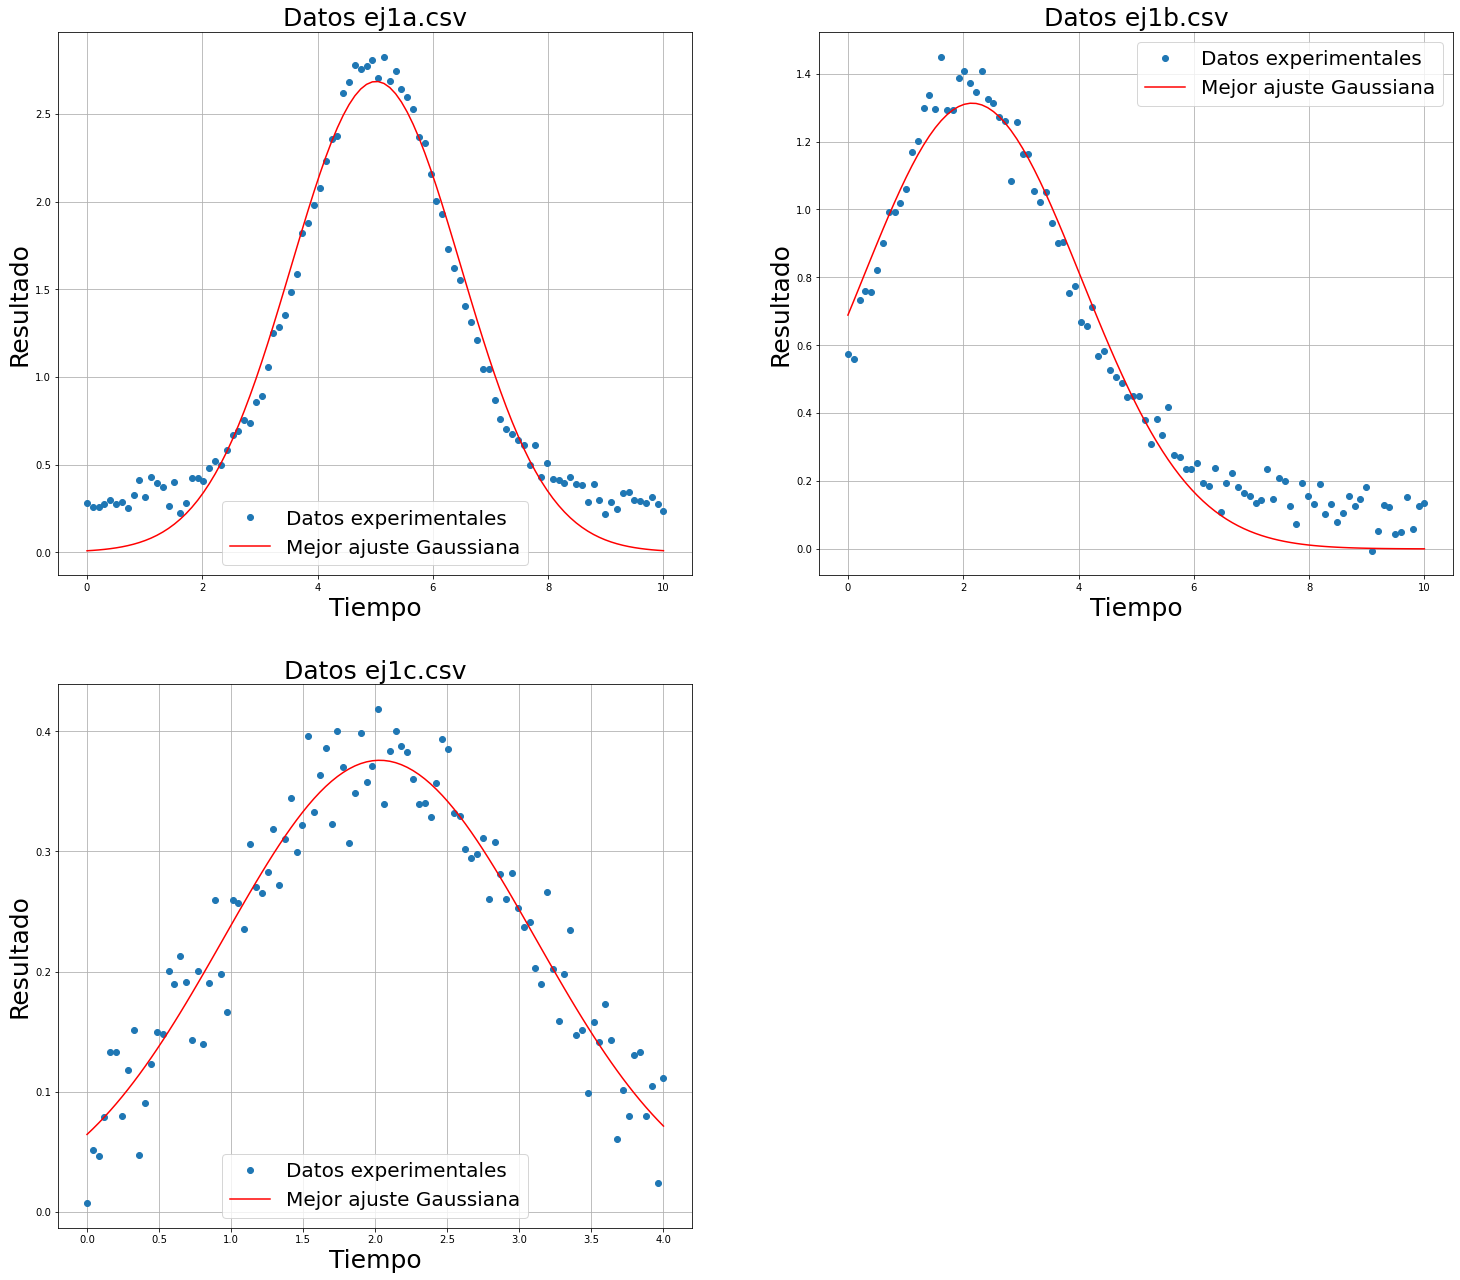

In [ ]:
plt.rcParams['figure.figsize'] = 25,22

# Ajuste Gaussiano para los datos ej1a.csv
ajuste1 = gaussiana(dat1t,mej_val1[0],mej_val1[1],mej_val1[2])
ax=plt.subplot(2,2,1)
plt.plot(dat1t,dat1r, 'o', label= 'Datos experimentales ')
plt.plot(dat1t,ajuste1, 'r', label = 'Mejor ajuste Gaussiana')
plt.title('Datos ej1a.csv',fontsize= 25)
plt.xlabel('Tiempo',fontsize= 25)
plt.ylabel('Resultado',fontsize= 25)
plt.legend(fontsize= 20)
plt.grid()

# Ajuste Gaussiano para los datos ej1b.csv

ajuste2 = gaussiana(dat1t,mej_val2[0],mej_val2[1],mej_val2[2])
#plt.figure()
ax=plt.subplot(2,2,2)
plt.plot(dat2t,dat2r, 'o', label= 'Datos experimentales ')
plt.plot(dat2t,ajuste2, 'r', label = 'Mejor ajuste Gaussiana')
plt.title('Datos ej1b.csv',fontsize= 25)
plt.xlabel('Tiempo',fontsize= 25)
plt.ylabel('Resultado',fontsize= 25)
plt.legend(fontsize= 20)
plt.grid()


# Ajuste Gaussiano para los datos ej1c.csv

ajuste3 = gaussiana(dat3t,mej_val3[0],mej_val3[1],mej_val3[2])
#plt.figure()
ax=plt.subplot(2,2,3)
plt.plot(dat3t,dat3r, 'o', label= 'Datos experimentales ')
plt.plot(dat3t,ajuste3, 'r', label = 'Mejor ajuste Gaussiana')
plt.title('Datos ej1c.csv',fontsize=25)
plt.xlabel('Tiempo',fontsize=25)
plt.ylabel('Resultado',fontsize=25)
plt.legend(fontsize= 20)
plt.grid()

Una vez se tienen los datos con el mejor ajuste, se encuentra el valor para chi cuadrado. Debemos dividir el conjunto de datos en intervalos y calcular sus frecuencias; para esto se hace uso del criterio de Struges mediante la siguiente relación

$$K = 1+3.3\log_{10}(N)$$  (1)

donde K representa el número de intervalos y N el número de elementos de la muestra. En este caso N=100

In [ ]:
#Definimos el numero de intervalos para el test de chi cuadrado usando el criterio de Sturges
nbin1l=int(1+3.322*log10(100))
print('Número de intervalos:',nbin1l)


#Definimos un rango mínimo y máximo común para los datos obtenidos experimentamente ej1a.csv y con el ajuste
dat1rmin=min(dat1r)
ajuste1min=min(ajuste1)
if dat1rmin>ajuste1min:
    ymin1=ajuste1min
else:
    ymin1=dat1rmin

dat1rmax=max(dat1r)
ajuste1max=max(ajuste1)
if dat1rmax>ajuste1max:
    ymax1=dat1rmax
else:
    ymax1=ajuste1max
print('Dato mínimo y máximo para ej1a.csv :',ymin1, ymax1)

#Definimos un rango mínimo y máximo común para los datos obtenidos experimentamente ej1b.csv y con el ajuste
dat2rmin=min(dat2r)
ajuste2min=min(ajuste2)
if dat2rmin>ajuste2min:
    ymin2=ajuste2min
else:
    ymin2=dat2rmin

dat2rmax=max(dat2r)
ajuste2max=max(ajuste2)
if dat2rmax>ajuste2max:
    ymax2=dat2rmax
else:
    ymax2=ajuste2max
print('Dato mínimo y máximo para ej1b.csv :',ymin2, ymax2)

#Definimos un rango mínimo y máximo común para los datos obtenidos experimentamente ej1c.csv y con el ajuste
dat3rmin=min(dat3r)
ajuste3min=min(ajuste3)
if dat3rmin>ajuste3min:
    ymin3=ajuste3min
else:
    ymin3=dat3rmin

dat3rmax=max(dat3r)
ajuste3max=max(ajuste3)
if dat3rmax>ajuste3max:
    ymax3=dat3rmax
else:
    ymax3=ajuste3max
print('Dato mínimo y máximo para ej1c.csv :',ymin3, ymax3)



Número de intervalos: 7
Dato mínimo y máximo para ej1a.csv : 0.00822604132759568 2.8279112202673535
Dato mínimo y máximo para ej1b.csv : -0.005466010173467928 1.4503424629485298
Dato mínimo y máximo para ej1c.csv : 0.007230295240223061 0.4186561495591871


Ya establecidos los intervalos, se procede a graficar el histograma con la función plt.hist para cada conjunto de datos.Se obtiene también el valor de chi cuadrado para cada uno de los ajustes.

Para ej1a.csv (n1):  [34. 24.  7.  8.  7.  7. 13.]
Para ej1a.csv (naj1):  [44. 11.  9.  6.  8.  9. 13.]
Chi cuadrado = 19.31691919191919
------------------------------------------------------------
Para ej1b.csv (n2):  [35. 13. 11.  9.  8.  8. 16.]
Para ej1b.csv (naj2):  [42.  8.  5.  9. 10. 14. 12.]
Chi cuadrado = 15.796428571428573
------------------------------------------------------------
Para ej1c.csv (n3):  [ 6. 11. 17. 15. 16. 20. 15.]
Para ej1c.csv (naj3):  [ 1. 20. 15. 14. 14. 20. 16.]
Chi cuadrado = 29.736309523809524
------------------------------------------------------------


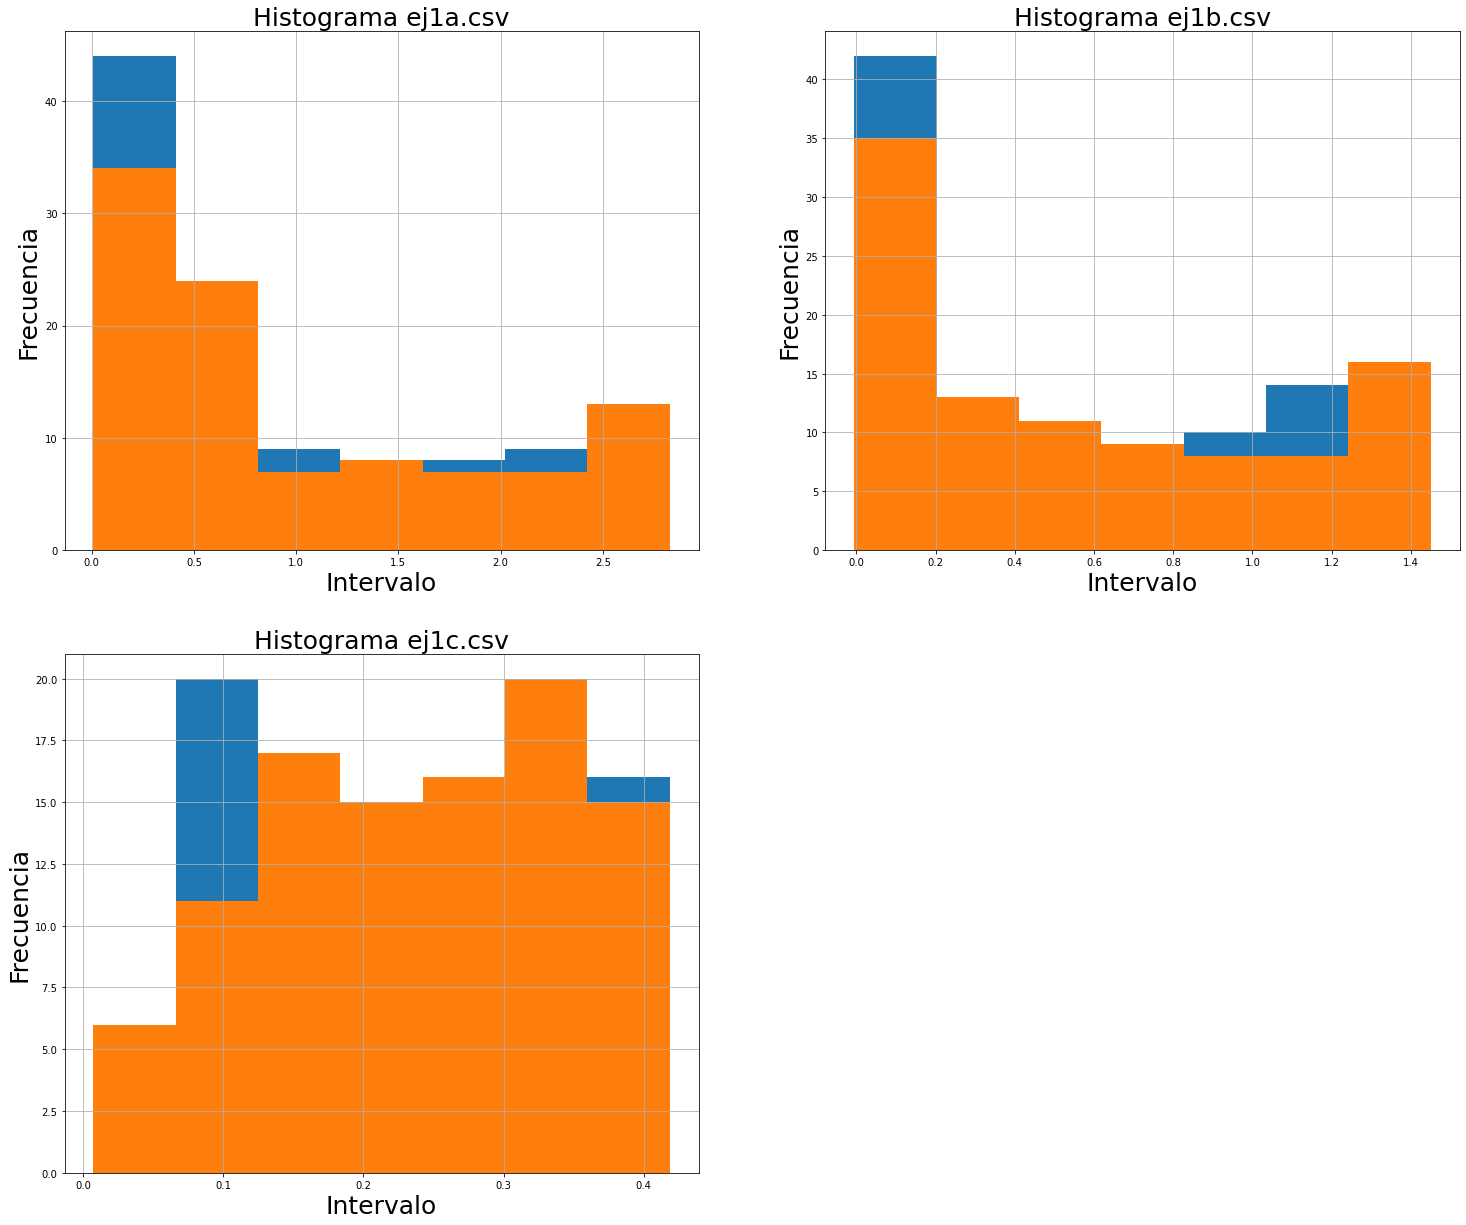

In [ ]:
#### Función chi cuadrado
def chi_sqr(dathistexp,dathistaj):
    return sum(((dathistexp-dathistaj)**2)/(dathistaj))

plt.rcParams['figure.figsize'] = 25,21

# Histograma ej1a.csv
ax=plt.subplot(2,2,1)
[naj1,baj,paj]=plt.hist(ajuste1,nbin1,range=(ymin1,ymax1))
[n1,b,p]=plt.hist(dat1r,nbin1,range=(ymin1,ymax1))
print('Para ej1a.csv (n1): ',n1)
print('Para ej1a.csv (naj1): ',naj1)
print('Chi cuadrado =',chi_sqr(n1,naj1))
print('--'*30)
plt.title('Histograma ej1a.csv',fontsize= 25)
plt.xlabel('Intervalo',fontsize= 25)
plt.ylabel('Frecuencia',fontsize= 25)
plt.grid()

# Histograma ej1b.csv
#plt.figure()
ax=plt.subplot(2,2,2)
[naj2,baj,paj]=plt.hist(ajuste2,nbin1,range=(ymin2,ymax2))
[n2,b,p]=plt.hist(dat2r,nbin1,range=(ymin2,ymax2))
print('Para ej1b.csv (n2): ',n2)
print('Para ej1b.csv (naj2): ',naj2)
print('Chi cuadrado =',chi_sqr(n2,naj2))
print('--'*30)
plt.title('Histograma ej1b.csv',fontsize= 25)
plt.xlabel('Intervalo',fontsize= 25)
plt.ylabel('Frecuencia',fontsize= 25)
plt.grid()

# Histograma ej1c.csv
#plt.figure()
ax=plt.subplot(2,2,3)
[naj3,baj,paj]=plt.hist(ajuste3,nbin1,range=(ymin3,ymax3))
[n3,b,p]=plt.hist(dat3r,nbin1,range=(ymin3,ymax3))
print('Para ej1c.csv (n3): ',n3)
print('Para ej1c.csv (naj3): ',naj3)
print('Chi cuadrado =',chi_sqr(n3,naj3))
plt.title('Histograma ej1c.csv',fontsize= 25)
plt.xlabel('Intervalo',fontsize= 25)
plt.ylabel('Frecuencia',fontsize= 25)
plt.grid()
print('--'*30)




# Ajuste con distribución de Poisson

Ahora se procede a encontrar los parámetros de ajuste para la distribución de Poisson; en este caso corresponden a la amplitud y la media.

In [ ]:
# Ajustes con distribución de Poisson ej1a.csv

val_ini = [1,5]
mej_valp1, covp1 = curve_fit(poisson,dat1t,dat1r,val_ini)
print('Información ej1a.csv')
print('mej_valp1: {}'.format(mej_valp1))
print('Matriz de covarianza',covp1)
print('--'*30)


# Ajustes con distribución de Poisson ej1b.csv

val_ini = [1,2]
mej_valp2, covp2 = curve_fit(poisson,dat2t,dat2r,val_ini)
print('Información ej1b.csv')
print('mej_valp2: {}'.format(mej_valp2))
print('Matriz de covarianza',covp2)
print('--'*30)


# Ajustes con distribución de Poisson ej1c.csv

val_ini = [0.5,2]
mej_valp3, covp3 = curve_fit(poisson,dat3t,dat3r,val_ini)
print('Información ej1c.csv')
print('mej_valp3: {}'.format(mej_valp3))
print('Matriz de covarianza:',covp3)

Información ej1a.csv
mej_valp1: [ 5.28485593 11.90184821]
Matriz de covarianza [[0.0101017  0.00619756]
 [0.00619756 0.13501874]]
------------------------------------------------------------
Información ej1b.csv
mej_valp2: [2.55417107 5.53416516]
Matriz de covarianza [[0.00075579 0.000407  ]
 [0.000407   0.00466102]]
------------------------------------------------------------
Información ej1c.csv
mej_valp3: [2.40878626 1.21859404]
Matriz de covarianza: [[0.00334475 0.00065558]
 [0.00065558 0.00085202]]


Encontremos ahora la varianza de los parámetros de ajuste, los cuales corresponden a la raíz de los elementos de la diagonal de la matríz de covarianza dada por curvefit.

In [ ]:
varp1 = sqrt(diag(covp1))
print('Varianza de parámetros ej1a.csv')
print(varp1)
print('--'*30)

varp2 = sqrt(diag(covp2))
print('Varianza de parámetros ej1b.csv')
print(varp2)
print('--'*30)

varp3 = sqrt(diag(covp3))
print('Varianza de parámetros ej1c.csv')
print(varp3)

Varianza de parámetros ej1a.csv
[0.1005072  0.36744896]
------------------------------------------------------------
Varianza de parámetros ej1b.csv
[0.0274917  0.06827168]
------------------------------------------------------------
Varianza de parámetros ej1c.csv
[0.05783381 0.02918933]


Procedemos ahora a calcular la curva que mejor se asemeja a los datos experimentales con los parámetros encontrados.

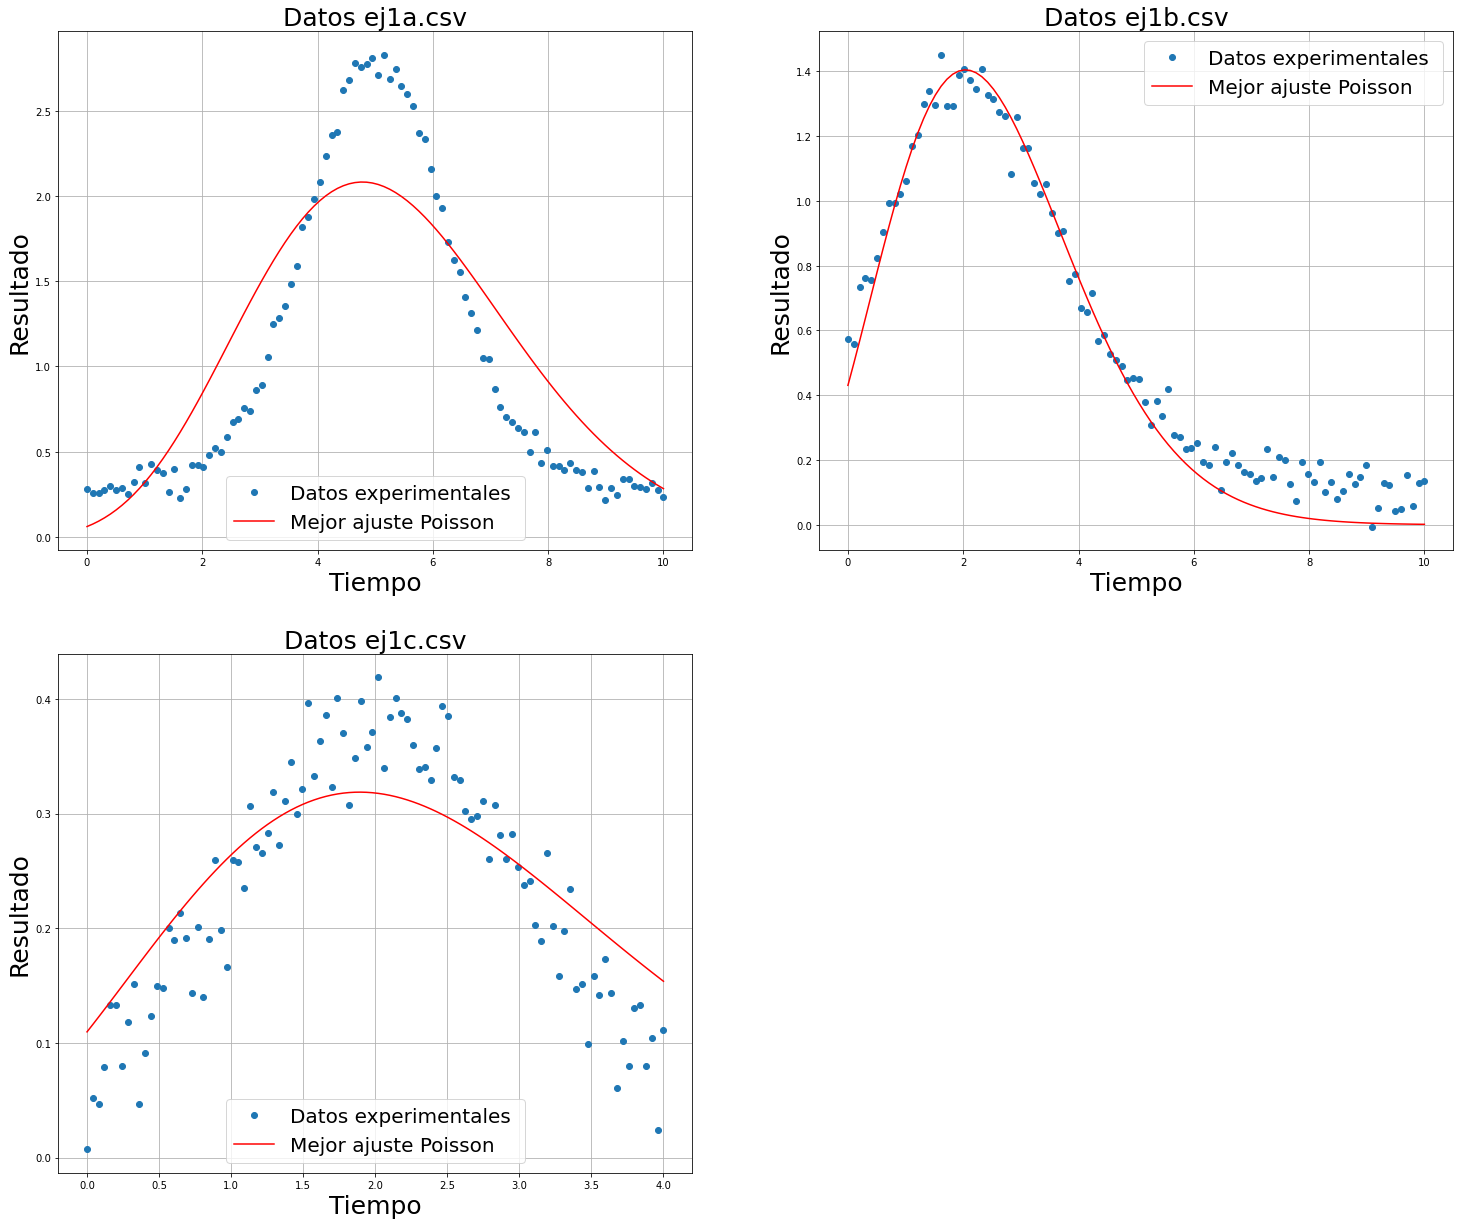

In [ ]:
plt.rcParams['figure.figsize'] = 25,21
# Ajuste de Poisson para los datos ej1a.csv
ajustep1 = poisson(dat1t,mej_valp1[0],mej_valp1[1])
ax=plt.subplot(2,2,1)
plt.plot(dat1t,dat1r, 'o', label= 'Datos experimentales ')
plt.plot(dat1t,ajustep1, 'r', label = 'Mejor ajuste Poisson')
plt.title('Datos ej1a.csv',fontsize= 25)
plt.xlabel('Tiempo',fontsize= 25)
plt.ylabel('Resultado',fontsize= 25)
plt.legend(fontsize= 20)
plt.grid()

# Ajuste Gaussiano para los datos ej1b.csv

ajustep2 = poisson(dat1t,mej_valp2[0],mej_valp2[1])
ax=plt.subplot(2,2,2)
plt.plot(dat2t,dat2r, 'o', label= 'Datos experimentales ')
plt.plot(dat2t,ajustep2, 'r', label = 'Mejor ajuste Poisson')
plt.title('Datos ej1b.csv',fontsize= 25)
plt.xlabel('Tiempo',fontsize= 25)
plt.ylabel('Resultado',fontsize= 25)
plt.legend(fontsize= 20)
plt.grid()


# Ajuste Gaussiano para los datos ej1c.csv

ajustep3 = poisson(dat3t,mej_valp3[0],mej_valp3[1])
ax=plt.subplot(2,2,3)
plt.plot(dat3t,dat3r, 'o', label= 'Datos experimentales ')
plt.plot(dat3t,ajustep3, 'r', label = 'Mejor ajuste Poisson')
plt.title('Datos ej1c.csv',fontsize= 25)
plt.xlabel('Tiempo',fontsize= 25)
plt.ylabel('Resultado',fontsize= 25)
plt.legend(fontsize= 20)
plt.grid()

Una vez se tienen los datos con el mejor ajuste se procede entonces a encontrar el valor para chi cuadrado. Debemos dividir eL conjunto de datos en intervalos; esto se logra medane la ecuación (1).


In [ ]:
#Definimos el numero de intervalos para el test de chi cuadrado usando el criterio de Sturges
nbinp1=int(1+3.322*log10(100))
print('Número de intervalos:',nbinp1)


#Definimos un rango mínimo y máximo común para los datos obtenidos experimentamente ej1a.csv y con el ajuste
datp1rmin=min(dat1r)
ajustep1min=min(ajustep1)
if datp1rmin>ajustep1min:
    yminp1=ajustep1min
else:
    yminp1=datp1rmin

datp1rmax=max(dat1r)
ajustep1max=max(ajustep1)
if datp1rmax>ajustep1max:
    ymaxp1=datp1rmax
else:
    ymaxp1=ajustep1max
print('Dato mínimo y máximo para ej1a.csv :',yminp1, ymaxp1)

#Definimos un rango mínimo y máximo común para los datos obtenidos experimentamente ej1b.csv y con el ajuste
datp2rmin=min(dat2r)
ajustep2min=min(ajustep2)
if datp2rmin>ajustep2min:
    yminp2=ajustep2min
else:
    yminp2=datp2rmin

datp2rmax=max(dat2r)
ajustep2max=max(ajustep2)
if datp2rmax>ajustep2max:
    ymaxp2=datp2rmax
else:
    ymaxp2=ajustep2max
print('Dato mínimo y máximo para ej1b.csv :',yminp2, ymaxp2)

#Definimos un rango mínimo y máximo común para los datos obtenidos experimentamente ej1c.csv y con el ajuste
datp3rmin=min(dat3r)
ajustep3min=min(ajustep3)
if datp3rmin>ajustep3min:
    yminp3=ajustep3min
else:
    yminp3=datp3rmin

datp3rmax=max(dat3r)
ajustep3max=max(ajustep3)
if datp3rmax>ajustep3max:
    ymaxp3=datp3rmax
else:
    ymaxp3=ajustep3max
print('Dato mínimo y máximo para ej1c.csv :',yminp3, ymaxp3)


Número de intervalos: 7
Dato mínimo y máximo para ej1a.csv : 0.06031573681727939 2.8279112202673535
Dato mínimo y máximo para ej1b.csv : -0.005466010173467928 1.4503424629485298
Dato mínimo y máximo para ej1c.csv : 0.007230295240223061 0.4186561495591871


Ya establecidos los intervalos, se grafica el histograma con la función plt.hist para cada conjunto de datos.Se obtiene también el valor de chi cuadrado para cada uno de los ajustes.

Para ej1a.csv (n1):  [42. 16.  7.  9.  6.  7. 13.]
Para ej1a.csv (naj1):  [21. 18. 15. 15. 21. 10.  0.]
Chi cuadrado = inf
------------------------------------------------------------
Para ej1b.csv (n2):  [35. 13. 11.  9.  8.  8. 16.]
Para ej1b.csv (naj2):  [42.  9.  8.  8.  8.  9. 16.]
Chi cuadrado = 4.305555555555555
------------------------------------------------------------
Para ej1c.csv (n3):  [ 6. 11. 17. 15. 16. 20. 15.]
Para ej1c.csv (naj3):  [ 0.  3. 17. 23. 31. 26.  0.]
Chi cuadrado = inf
------------------------------------------------------------


<ipython-input-63-3bcb795fddc2>:3: RuntimeWarning: divide by zero encountered in true_divide
  return sum(((dathistexp-dathistaj)**2)/(dathistaj))


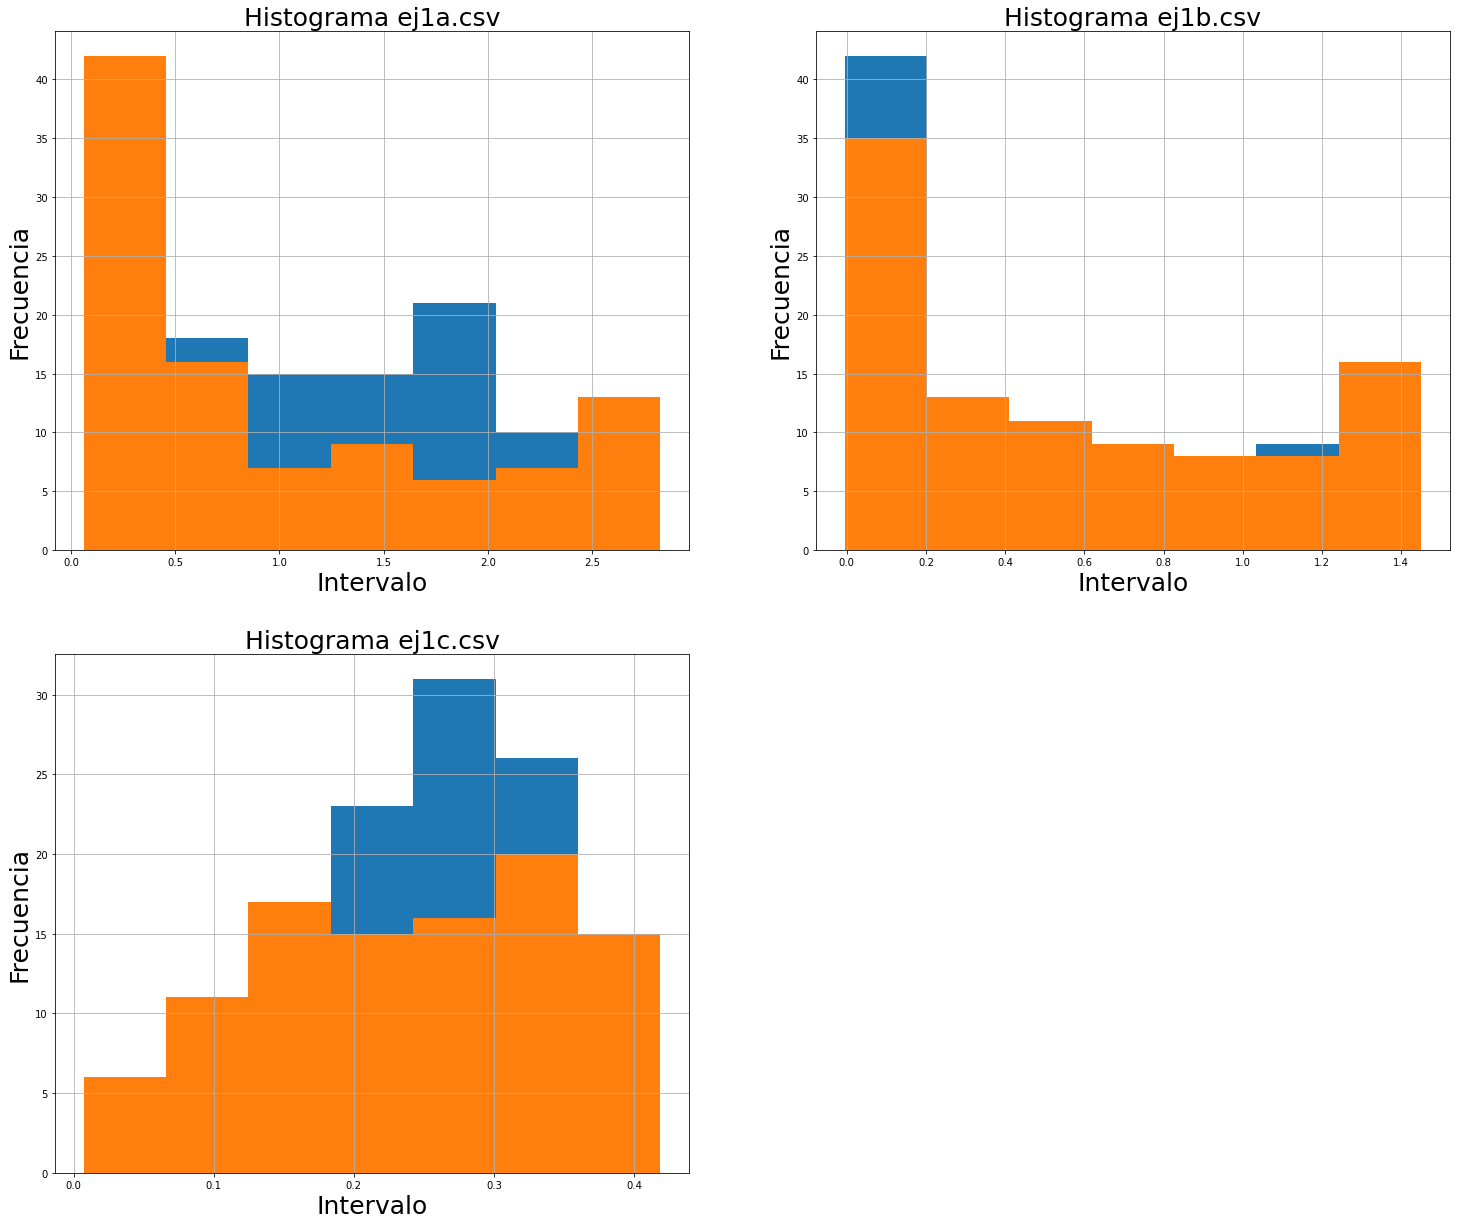

In [ ]:
# Función chi cuadrado
def chi_sqr(dathistexp,dathistaj):
    return sum(((dathistexp-dathistaj)**2)/(dathistaj))

plt.rcParams['figure.figsize'] = 25,21

# Histograma ej1a.csv
ax=plt.subplot(2,2,1)
[najp1,baj,paj]=plt.hist(ajustep1,nbinp1,range=(yminp1,ymaxp1))
[np1,b,p]=plt.hist(dat1r,nbin1,range=(yminp1,ymaxp1))
print('Para ej1a.csv (n1): ',np1)
print('Para ej1a.csv (naj1): ',najp1)
print('Chi cuadrado =',chi_sqr(np1,najp1))
print('--'*30)
plt.title('Histograma ej1a.csv',fontsize= 25)
plt.xlabel('Intervalo',fontsize= 25)
plt.ylabel('Frecuencia',fontsize= 25)
plt.grid()

# Histograma ej1b.csv
x=plt.subplot(2,2,2)
[najp2,baj,paj]=plt.hist(ajustep2,nbinp1,range=(yminp2,ymaxp2))
[np2,b,p]=plt.hist(dat2r,nbin1,range=(yminp2,ymaxp2))
print('Para ej1b.csv (n2): ',np2)
print('Para ej1b.csv (naj2): ',najp2)
print('Chi cuadrado =',chi_sqr(np2,najp2))
print('--'*30)
plt.title('Histograma ej1b.csv',fontsize= 25)
plt.xlabel('Intervalo',fontsize= 25)
plt.ylabel('Frecuencia',fontsize= 25)
plt.grid()

# Histograma ej1c.csv
x=plt.subplot(2,2,3)
[najp3,baj,paj]=plt.hist(ajustep3,nbinp1,range=(yminp3,ymaxp3))
[np3,b,p]=plt.hist(dat3r,nbin1,range=(yminp3,ymaxp3))
print('Para ej1c.csv (n3): ',np3)
print('Para ej1c.csv (naj3): ',najp3)
print('Chi cuadrado =',chi_sqr(np3,najp3))
plt.title('Histograma ej1c.csv',fontsize= 25)
plt.xlabel('Intervalo',fontsize= 25)
plt.ylabel('Frecuencia',fontsize= 25)
plt.grid()
print('--'*30)

# Ajuste por distribución binomial

Ahora se procede a encontrar los parámetros de ajuste para la distribución de binomial; en este caso corresponden a la probabilidad de éxitos (p), el número de pruebas (n) y la amplitud.

Es importante destacar que no se conoce el valor de la probabilidad (p), y por tanto se tomará como parámetro inicial una probabilidad del 50%. Por otro lado, el número de pruebas (n) empieza a ser testeado para distintos valores, dejándo un valor final de aproximadamente 35 el cual mostrará cambios  mejoras en la gráfica de ajuste.

In [ ]:
# Ajustes con distribución de Poisson ej1a.csv

val_ini = [0.5,35,1]
mej_valb1, covb1 = curve_fit(binomial,dat1t,dat1r,val_ini)
print('Información ej1a.csv')
print('mej_valb1: {}'.format(mej_valb1))
print('Matriz de covarianza',covb1)
print('--'*30)


# Ajustes con distribución de Poisson ej1b.csv

val_ini = [0.5,35,1]
mej_valb2, covb2 = curve_fit(binomial,dat2t,dat2r,val_ini)
print('Información ej1b.csv')
print('mej_valb2: {}'.format(mej_valb2))
print('Matriz de covarianza',covb2)
print('--'*30)



# Ajustes con distribución de Poisson ej1c.csv

val_ini = [0.5,35,1]
mej_valb3, covb3 = curve_fit(binomial,dat3t,dat3r,val_ini)
print('Información ej1c.csv')
print('mej_valb3: {}'.format(mej_valb3))
print('Matriz de covarianza:',covb3)

Información ej1a.csv
mej_valb1: [ 0.50048708 10.00000016 10.31434012]
Matriz de covarianza [[ 0.00040867 -0.00837127 -0.00210913]
 [-0.00837127  0.17606928  0.04435804]
 [-0.00210913  0.04435804  0.03504105]]
------------------------------------------------------------
Información ej1b.csv
mej_valb2: [1.49177489e-02 1.70624257e+02 5.51132434e+00]
Matriz de covarianza [[ 1.26920424e-03 -1.45569972e+01 -1.70879133e-03]
 [-1.45569972e+01  1.66963408e+05  1.96271808e+01]
 [-1.70879133e-03  1.96271808e+01  7.20034836e-03]]
------------------------------------------------------------
Información ej1c.csv
mej_valb3: [0.50627426 4.00046213 0.99322149]
Matriz de covarianza: [[ 0.00034792 -0.00304528 -0.00019218]
 [-0.00304528  0.02799972  0.00176546]
 [-0.00019218  0.00176546  0.00025628]]


Encontremos ahora la varianza de los parámetros de ajuste, los cuales corresponden a la raíz de los elementos de la diagonal de la matríz de covarianza dada por curvefit.

In [ ]:
varb1 = sqrt(diag(covb1))
print('Varianza de parámetros ej1a.csv')
print(varb1)
print('--'*30)

varb2 = sqrt(diag(covb2))
print('Varianza de parámetros ej1b.csv')
print(varb2)
print('--'*30)

varb3 = sqrt(diag(covb3))
print('Varianza de parámetros ej1c.csv')
print(varb3)

Varianza de parámetros ej1a.csv
[0.0202156  0.4196061  0.18719254]
------------------------------------------------------------
Varianza de parámetros ej1b.csv
[3.56258928e-02 4.08611562e+02 8.48548664e-02]
------------------------------------------------------------
Varianza de parámetros ej1c.csv
[0.01865265 0.16733116 0.0160086 ]


Procedemos ahora a calcular la curva que mejor se asemeja a los datos experimentales con los parámetros encontrados.

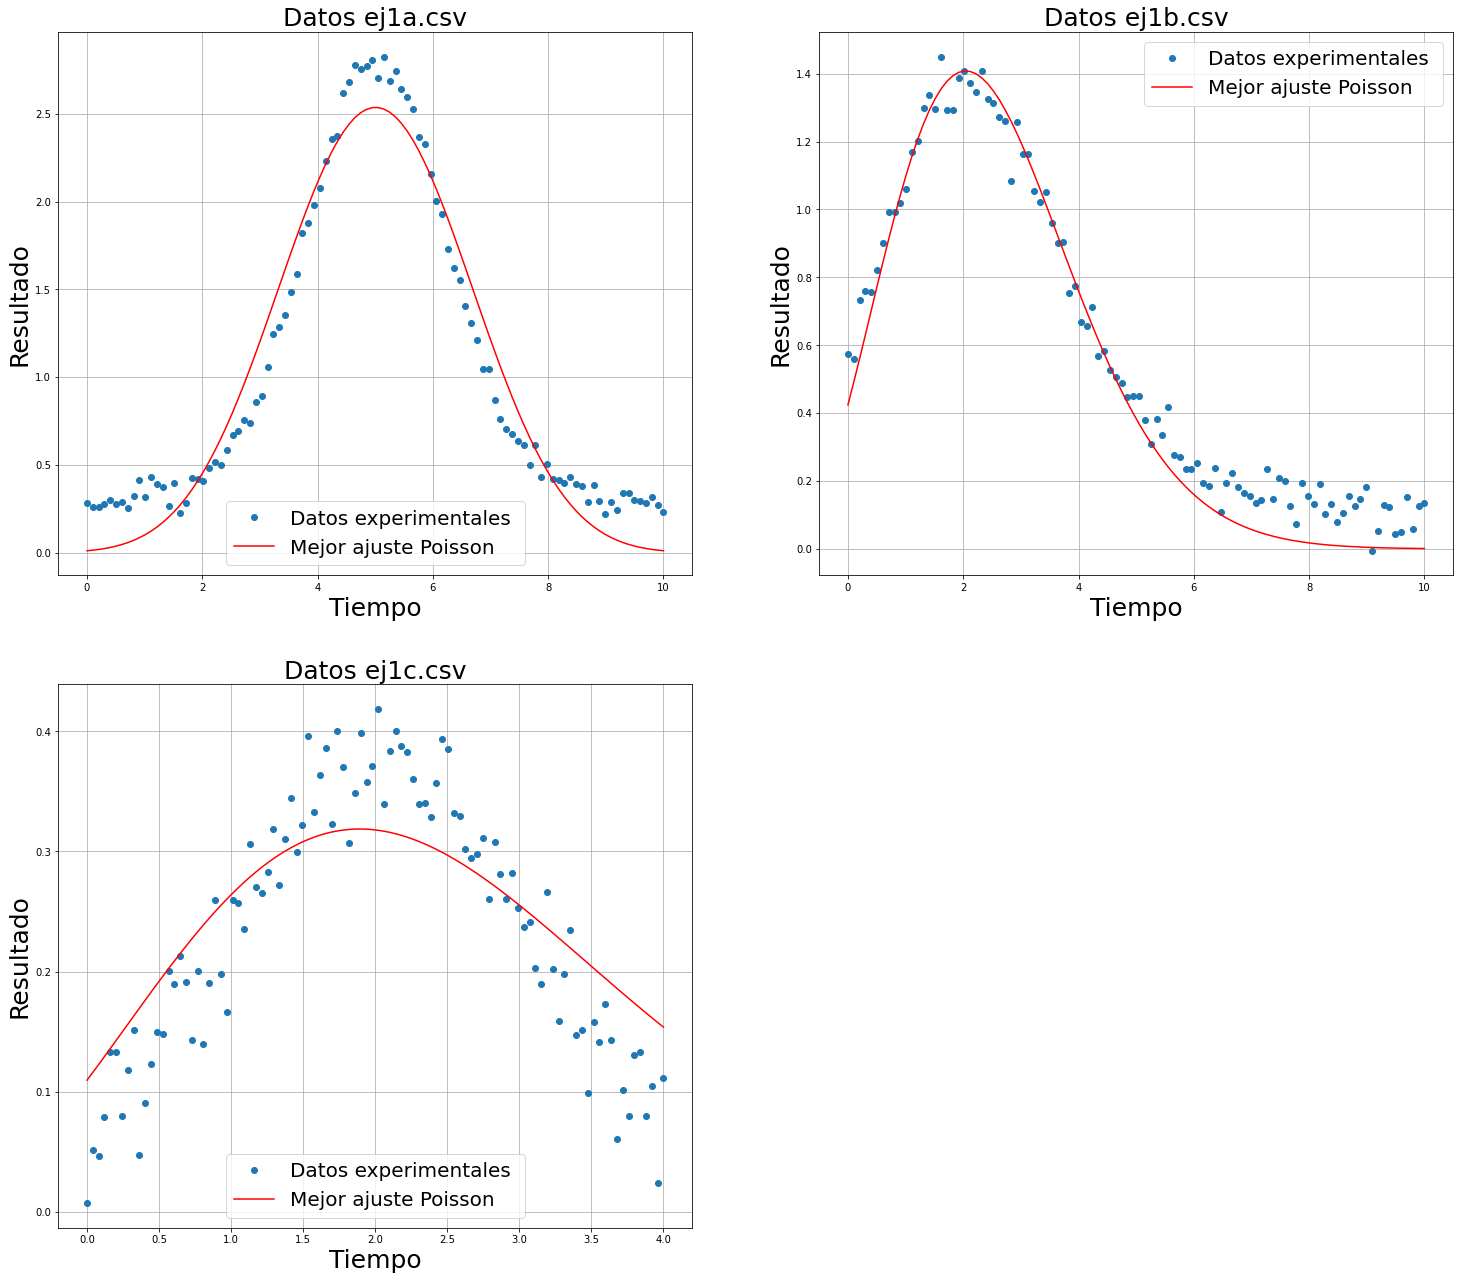

In [ ]:
plt.rcParams['figure.figsize'] = 25,22
# Ajuste de binomial para los datos ej1a.csv
ajusteb1 = binomial(dat1t,mej_valb1[0],mej_valb1[1],mej_valb1[2])
ax=plt.subplot(2,2,1)
plt.plot(dat1t,dat1r, 'o', label= 'Datos experimentales ')
plt.plot(dat1t,ajusteb1, 'r', label = 'Mejor ajuste Poisson')
plt.title('Datos ej1a.csv',fontsize= 25)
plt.xlabel('Tiempo',fontsize= 25)
plt.ylabel('Resultado',fontsize= 25)
plt.legend(fontsize= 20)
plt.grid()

# Ajuste binomial para los datos ej1b.csv

ajusteb2 = binomial(dat1t,mej_valb2[0],mej_valb2[1], mej_valb2[2] )
ax=plt.subplot(2,2,2)
plt.plot(dat2t,dat2r, 'o', label= 'Datos experimentales ')
plt.plot(dat2t,ajusteb2, 'r', label = 'Mejor ajuste Poisson')
plt.title('Datos ej1b.csv',fontsize= 25)
plt.xlabel('Tiempo',fontsize= 25)
plt.ylabel('Resultado',fontsize= 25)
plt.legend(fontsize= 20)
plt.grid()


# Ajuste Gaussiano para los datos ej1c.csv

ajusteb3 = binomial(dat3t,mej_valb3[0],mej_valb3[1],mej_valb3[2])
ax=plt.subplot(2,2,3)
plt.plot(dat3t,dat3r, 'o', label= 'Datos experimentales ')
plt.plot(dat3t,ajustep3, 'r', label = 'Mejor ajuste Poisson')
plt.title('Datos ej1c.csv',fontsize= 25)
plt.xlabel('Tiempo',fontsize= 25)
plt.ylabel('Resultado',fontsize= 25)
plt.legend(fontsize= 20)
plt.grid()

Una vez se tienen los datos con el mejor ajuste, se procede entonces a encontrar el valor para chi cuadrado. Debemos dividir el conjunto de datos en intervalos, nuevamente mediante el criterio de Struges dado por la ecuación (1).

In [ ]:
#Definimos el numero de intervalos para el test de chi cuadrado usando el criterio de Sturges
nbinb1=int(1+3.322*log10(100))
print('Número de intervalos:',nbinp1)

#Definimos un rango mínimo y máximo común para los datos obtenidos experimentamente ej1a.csv y con el ajuste
datb1rmin=min(dat1r)
ajusteb1min=min(ajusteb1)
if datb1rmin>ajusteb1min:
    yminb1=ajusteb1min
else:
    yminb1=datb1rmin

datb1rmax=max(dat1r)
ajusteb1max=max(ajusteb1)
if datb1rmax>ajusteb1max:
    ymaxb1=datb1rmax
else:
    ymaxb1=ajusteb1max
print('Dato mínimo y máximo para ej1a.csv :',yminb1, ymaxb1)

#Definimos un rango mínimo y máximo común para los datos obtenidos experimentamente ej1b.csv y con el ajuste
datb2rmin=min(dat2r)
ajusteb2min=min(ajusteb2)
if datb2rmin>ajusteb2min:
    yminb2=ajusteb2min
else:
    yminb2=datb2rmin

datb2rmax=max(dat2r)
ajusteb2max=max(ajusteb2)
if datb2rmax>ajusteb2max:
    ymaxb2=datb2rmax
else:
    ymaxb2=ajusteb2max
print('Dato mínimo y máximo para ej1b.csv :',yminb2, ymaxb2)

#Definimos un rango mínimo y máximo común para los datos obtenidos experimentamente ej1c.csv y con el ajuste
datb3rmin=min(dat3r)
ajusteb3min=min(ajusteb3)
if datb3rmin>ajusteb3min:
    yminb3=ajusteb3min
else:
    yminb3=datb3rmin

datb3rmax=max(dat3r)
ajusteb3max=max(ajusteb3)
if datb3rmax>ajusteb3max:
    ymaxb3=datb3rmax
else:
    ymaxb3=ajusteb3max
print('Dato mínimo y máximo para ej1c.csv :',yminb3, ymaxb3)


Número de intervalos: 7
Dato mínimo y máximo para ej1a.csv : 0.009974902008623549 2.8279112202673535
Dato mínimo y máximo para ej1b.csv : -0.005466010173467928 1.4503424629485298
Dato mínimo y máximo para ej1c.csv : 0.007230295240223061 0.4186561495591871


Ya establecidos los intervalos, se procede a graficar el histograma con la función plt.hist para cada conjunto de datos. Se obtiene también el valor de chi cuadrado para cada uno de los ajustes.

Para ej1a.csv (n1):  [35. 23.  7.  8.  7.  7. 13.]
Para ej1a.csv (naj1):  [39. 13.  8.  9.  9. 12. 10.]
Chi cuadrado = 11.766452991452992
------------------------------------------------------------
Para ej1b.csv (n2):  [35. 13. 11.  9.  8.  8. 16.]
Para ej1b.csv (naj2):  [43.  8.  9.  7.  8.  9. 16.]
Chi cuadrado = 5.740356220007382
------------------------------------------------------------
Para ej1c.csv (n3):  [ 6. 11. 17. 15. 16. 20. 15.]
Para ej1c.csv (naj3):  [ 3. 18. 14. 14. 15. 21. 15.]
Chi cuadrado = 6.550793650793651
------------------------------------------------------------


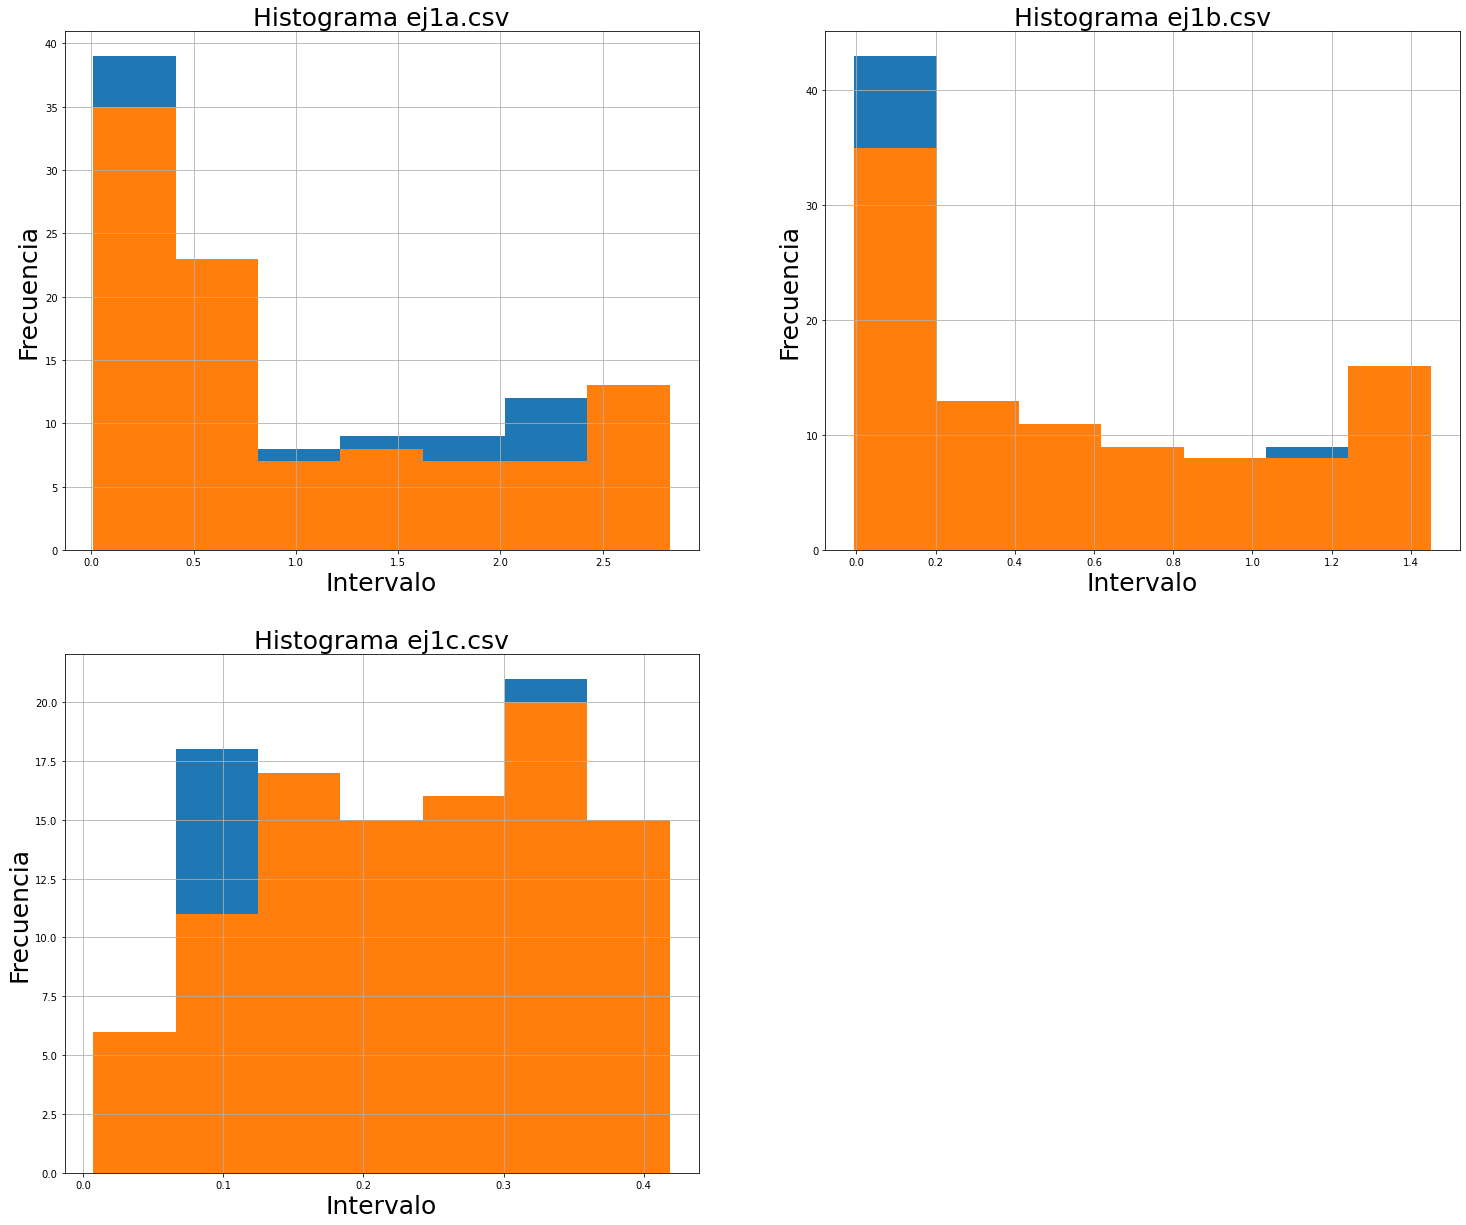

In [ ]:
# Función chi cuadrado
def chi_sqr(dathistexp,dathistaj):
    return sum(((dathistexp-dathistaj)**2)/(dathistaj))


plt.rcParams['figure.figsize'] = 25,21

# Histograma ej1a.csv
ax=plt.subplot(2,2,1)
[najb1,baj,paj]=plt.hist(ajusteb1,nbinb1,range=(yminb1,ymaxb1))
[nb1,b,p]=plt.hist(dat1r,nbin1,range=(yminb1,ymaxb1))
print('Para ej1a.csv (n1): ',nb1)
print('Para ej1a.csv (naj1): ',najb1)
print('Chi cuadrado =',chi_sqr(nb1,najb1))
print('--'*30)
plt.title('Histograma ej1a.csv',fontsize= 25)
plt.xlabel('Intervalo',fontsize= 25)
plt.ylabel('Frecuencia',fontsize= 25)
plt.grid()

# Histograma ej1b.csv
ax=plt.subplot(2,2,2)
[najb2,baj,paj]=plt.hist(ajusteb2,nbinb1,range=(yminb2,ymaxb2))
[nb2,b,p]=plt.hist(dat2r,nbin1,range=(yminb2,ymaxb2))
print('Para ej1b.csv (n2): ',nb2)
print('Para ej1b.csv (naj2): ',najb2)
print('Chi cuadrado =',chi_sqr(nb2,najb2))
print('--'*30)
plt.title('Histograma ej1b.csv',fontsize= 25)
plt.xlabel('Intervalo',fontsize= 25)
plt.ylabel('Frecuencia',fontsize= 25)
plt.grid()

# Histograma ej1c.csv
ax=plt.subplot(2,2,3)
[najb3,baj,paj]=plt.hist(ajusteb3,nbinb1,range=(yminb3,ymaxb3))
[nb3,b,p]=plt.hist(dat3r,nbin1,range=(yminb3,ymaxb3))
print('Para ej1c.csv (n3): ',nb3)
print('Para ej1c.csv (naj3): ',najb3)
print('Chi cuadrado =',chi_sqr(nb3,najb3))
plt.title('Histograma ej1c.csv',fontsize= 25)
plt.xlabel('Intervalo',fontsize= 25)
plt.ylabel('Frecuencia',fontsize= 25)
plt.grid()
print('--'*30)

# Conclusiones

A partir de los distintos ajustes se obtuvieron valores distintos de chi cuadrado para cada tipo de experimento. Se procede entonces a comparar los valores de este parametro para determinar cuál es la mejor distribución que modela el conjunto de datos.

## **Experimento  ej1a.csv**
* Valor de chi cuadrado para ajuste Gaussiano: 19.317

* Valor de chi cuadrado para ajuste de Poisson: inf

* Valor de chi cuadrado para ajuste Binomial: 11.766



## **Experimento  ej1b.csv**
* Valor de chi cuadrado para ajuste Gaussiano: 15.796

* Valor de chi cuadrado para ajuste de Poisson: 4.306

* Valor de chi cuadrado para ajuste Binomial: 5.740



## **Experimento  ej1c.csv**
* Valor de chi cuadrado para ajuste Gaussiano: 29.736

* Valor de chi cuadrado para ajuste de Poisson: inf

* Valor de chi cuadrado para ajuste Binomial: 6.551


Se observa entonces que el experimento  ej1a.csv está mejor descrito mediante una distribución binomial, el experimento ej1b.csv se ajusta a una distribución de Poisson y finalmente, el experimento ej1c.csv se describe mejor, al igual que el experimento ej1a.csv, con un ajuste binomial.

Es interesante notar la divergencia del factor de chi cuadrado en algunos de estos ajustes, pues se podría entender como un conjunto de datos que en definitiva describen un fenómeno que puede ser estudiado a partir de una función de distribución distinta.

